In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from examples.fep_control import fep_control
from combinators.model import active
from combinators.model import compose, foldable
from combinators.inference import importance
from combinators import utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
target = fep_control.MountainCarAgent(observation_dim=2, state_dim=2, batch_shape=(10,), trainable=False)
proposal = fep_control.RecognitionAgent(state_dim=2, action_dim=1, observation_dim=2, batch_shape=(10,),
                                        discrete_actions=False, name='MountainCarAgent', trainable=True,
                                        goal=target.goal)
agent = importance.propose(target, proposal)

In [5]:
episode = active.ActiveEpisode(agent, 'MountainCarContinuous-v0')

In [6]:
theta, graph, log_weight = episode(render=True)

In [7]:
xi, elbos = active.active_variational(episode, 10, lr=1e-2, log_estimator=True, patience=None)

11/08/2019 15:13:37 Episode length: 992
11/08/2019 15:13:44 Episode length: 1000
11/08/2019 15:13:50 ELBO=-2.37657928e+02 per step at epoch 1
11/08/2019 15:13:55 Episode length: 768
11/08/2019 15:14:00 ELBO=-2.30177078e+02 per step at epoch 2
11/08/2019 15:14:07 Episode length: 1000
11/08/2019 15:14:13 ELBO=-2.11793762e+02 per step at epoch 3
11/08/2019 15:14:18 Episode length: 779
11/08/2019 15:14:23 ELBO=-2.07499466e+02 per step at epoch 4
11/08/2019 15:14:26 Episode length: 297
11/08/2019 15:14:28 ELBO=-1.83879105e+02 per step at epoch 5
11/08/2019 15:14:32 Episode length: 716
11/08/2019 15:14:37 ELBO=-1.78403244e+02 per step at epoch 6
11/08/2019 15:14:39 Episode length: 314
11/08/2019 15:14:41 ELBO=-1.75077591e+02 per step at epoch 7
11/08/2019 15:14:46 Episode length: 703
11/08/2019 15:14:50 ELBO=-1.57911102e+02 per step at epoch 8
11/08/2019 15:14:55 Episode length: 696
11/08/2019 15:14:59 ELBO=-1.48472458e+02 per step at epoch 9
11/08/2019 15:15:04 Episode length: 739
11/08/201

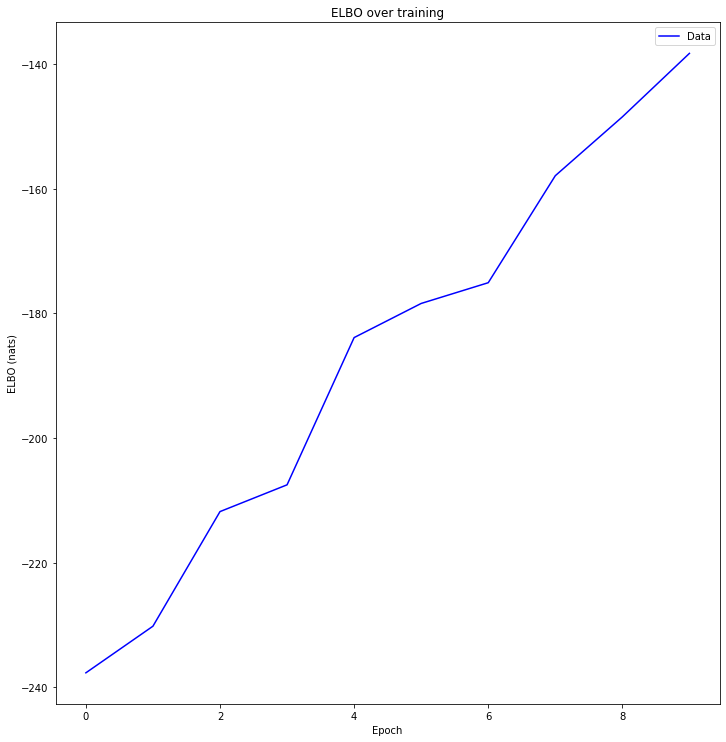

In [8]:
utils.plot_evidence_bounds(elbos[:, 0].cpu().detach().numpy())

In [9]:
theta, graph, log_weight = episode(render=True)

In [10]:
theta

{'dynamics': tensor([[-0.8564,  0.1956],
         [-0.8698,  0.0809],
         [-0.8792,  0.0523],
         [-0.8967,  0.0870],
         [-0.8136,  0.0475],
         [-0.8810,  0.0740],
         [-0.8650,  0.0621],
         [-0.8577,  0.0881],
         [-0.8423,  0.0714],
         [-0.8678,  0.1140]], grad_fn=<AddmmBackward>),
 'control': tensor([[-0.4726],
         [-0.4726],
         [-0.4726],
         [-0.4726],
         [-0.4726],
         [-0.4726],
         [-0.4726],
         [-0.4726],
         [-0.4726],
         [-0.4726]], grad_fn=<HardtanhBackward0>),
 't': 969}

In [11]:
log_weight

tensor([-128215.6484, -132631.1875, -123350.6094, -123364.4609, -121481.8203,
        -127287.8125, -124221.4219, -126753.8203, -128652.0938, -123636.1953],
       grad_fn=<AddBackward0>)

In [12]:
torch.save(agent, 'examples/fep_control/fep_mountain_car_agent.dat')

/home/eli/anaconda3/envs/funcytorch/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Propose. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/eli/anaconda3/envs/funcytorch/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MountainCarAgent. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/eli/anaconda3/envs/funcytorch/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MountainCarEnergy. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/eli/anaconda3/envs/funcytorch/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't